<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#NetworkCreator-Docstring" data-toc-modified-id="NetworkCreator-Docstring-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>NetworkCreator Docstring</a></span></li><li><span><a href="#Sample-code" data-toc-modified-id="Sample-code-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample code</a></span></li><li><span><a href="#Walkthrough" data-toc-modified-id="Walkthrough-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Walkthrough</a></span><ul class="toc-item"><li><span><a href="#Define-prediction-columns" data-toc-modified-id="Define-prediction-columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Define prediction columns</a></span></li><li><span><a href="#Define-number-of-days-to-predict-with" data-toc-modified-id="Define-number-of-days-to-predict-with-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Define number of days to predict with</a></span></li><li><span><a href="#Define-parameters" data-toc-modified-id="Define-parameters-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Define parameters</a></span></li><li><span><a href="#Instantiate-creator" data-toc-modified-id="Instantiate-creator-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Instantiate creator</a></span></li><li><span><a href="#Prepare-data" data-toc-modified-id="Prepare-data-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Prepare data</a></span><ul class="toc-item"><li><span><a href="#def-clean_cols" data-toc-modified-id="def-clean_cols-4.5.1"><span class="toc-item-num">4.5.1&nbsp;&nbsp;</span>def clean_cols</a></span></li><li><span><a href="#def-split_dataframe" data-toc-modified-id="def-split_dataframe-4.5.2"><span class="toc-item-num">4.5.2&nbsp;&nbsp;</span>def split_dataframe</a></span></li><li><span><a href="#def-split_and_scale_dataframes" data-toc-modified-id="def-split_and_scale_dataframes-4.5.3"><span class="toc-item-num">4.5.3&nbsp;&nbsp;</span>def split_and_scale_dataframes</a></span></li><li><span><a href="#def-reshape_data" data-toc-modified-id="def-reshape_data-4.5.4"><span class="toc-item-num">4.5.4&nbsp;&nbsp;</span>def reshape_data</a></span></li><li><span><a href="#def-create_TS_generators" data-toc-modified-id="def-create_TS_generators-4.5.5"><span class="toc-item-num">4.5.5&nbsp;&nbsp;</span>def create_TS_generators</a></span></li></ul></li><li><span><a href="#def-build_and_fit_model" data-toc-modified-id="def-build_and_fit_model-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>def build_and_fit_model</a></span></li><li><span><a href="#Fit" data-toc-modified-id="Fit-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Fit</a></span></li></ul></li></ul></div>

> Here we will be walking through how the NetworkCreator actually works by breaking out the code from the class.

# Imports

In [1]:
import pandas as pd
from modeling.create import NetworkCreator
df = pd.read_pickle("./data/modeling/model_df.pkl")

Using TensorFlow backend.


In [2]:
df.head()

,A_RevenueTTM,A_TotalCash,A_ExDividendDate,A_Dividend,A_DividendYield,A_PriceToBook,A_PriceToSales,A_EnterpriseValue,A_PriceToCashFlow,A_PE,...,ZTS_McLeanCapital,ZTS_NedDavis,ZTS_TradingCentral,ZTS_Zacks,ZTS_SPValuation,ZTS_SPQuality,ZTS_SPGrowthStability,ZTS_SPFinancialHealth,ZTS_ThomsonReutersVerus,ZTS_ThomsonReutersIBES
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,5019.0,2155.0,0,0.164,0.94402,4.29809,4.40182,2.167070e+10,16.57368,19.8,...,3.0,3.0,1,3,88.0,87.0,30.0,58.0,3.0,1.941
2019-08-12,5019.0,2155.0,0,0.164,0.95571,4.24551,4.34797,2.140126e+10,16.37095,19.2,...,3.0,3.0,1,3,88.0,87.0,30.0,58.0,3.0,1.941
2019-08-13,5019.0,2155.0,0,0.164,0.98454,4.12119,4.22065,2.076411e+10,15.89156,19.5,...,3.0,3.0,1,5,88.0,87.0,28.0,56.0,3.0,1.941
2019-08-14,5019.0,2155.0,0,0.164,0.96984,4.18366,4.28463,2.108427e+10,16.13245,18.9,...,3.0,3.0,1,5,88.0,87.0,28.0,56.0,3.0,1.941
2019-08-15,5090.0,1765.0,0,0.164,1.00015,4.28332,4.06782,2.036590e+10,16.05056,20.8,...,3.0,3.0,1,5,88.0,87.0,30.0,57.0,3.0,1.941


# NetworkCreator Docstring

```python
"""
    For creating a Time Series predicting neural network
    Used for
        - tuning model parameters
        - testing tuned parameters
        - cleaning the TS data
        - delivering model reports

    Parameters
    ----------------------------------------
    df{pd.DataFrame}::
        A dataframe consisting of X_cols and y_cols
    X_cols[list, str]::
        Either uses a list to directly slice the
        data and targets, OR uses all columns that
        contain the supplied string.
    y_cols[list, str]::
        Either uses a list to directly slice the
        data and targets, OR uses all columns that
        contain the supplied string.
    n_days(int)::
        Number of days to use in each days prediction
        EX:)  if n_days was 3
            - slice targets[3:]
            - use data[0:4] to predict first target
            - data[1:5] to predict next target
            - ...
    test_split=0.3(float 0-1)::
        The decimal percentage to split the
        test data on
    val_split=0.05(float 0-1)::
        The decimal percentage to split the
        val data on

    Example Usage
    ----------------------------------------
    # Import libraries
    >>> import matplotlib.pyplot as plt
    >>> import seaborn as sns
    >>> import pandas as pd

    # Load dataset
    >>> flights = sns.load_dataset('flights')

    # Define n_years could also be n_days
    >>> n_years = 1

    # Map month strings to 0-12
    >>> month_map = flights['month'][:12].reset_index(drop=True).to_dict()
    >>> flights['month'] = flights['month'].map(month_map)

    # Instantiate NetworkCreator
    >>> creator = NetworkCreator(flights, 'month', 'passengers', n_years)

    # build and fit model ( With default parameters )
    >>> creator.build_and_fit_model(dummy_hp=True)

    # Fit model
    >>> history = creator.model.fit(
    >>>     creator.train_data_gen,
    >>>     validation_data=creator.val_data_gen,
    >>>     epochs=10)

    # Plot the loss and val_loss
    >>> plt.plot(history.history['loss'])
    >>> plt.plot(history.history['val_loss'])
    >>> plt.legend(['train', 'test'])
    >>> plt.show()
 """
 ```

# Sample code
> Below is sample code for how we would use the NetworkCreator class.  We will be walking through how it works below

```python
# Define prediction columns
X_cols = [col for col in model_df.columns if 'AAPL' in col]
y_cols = 'AAPL_price'

# Define number of days to predict with
n_days = 1

# Define parameters
parameters = {
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.1,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.5,
    'n_hidden_layers': 1,
    'hidden_neurons': 32,
    'patience': 5,
    'use_early_stopping': 0,
    'batch_size': 32,
    'input_regularizer_penalty': 0.1,
    'hidden_regularizer_penalty': 0.3
                  }

# Instantiate creator
creator = NetworkCreator(df, X_cols, y_cols, n_days)

# Build and facade fit model with base parameters
creator.build_and_fit_model(**parameters, dummy_hp=True)

# Real fit model
history = creator.model.fit(
    creator.train_data_gen,
    validation_data=creator.val_data_gen,
    epochs=10)
```

# Walkthrough

## Define prediction columns
> First we will be defining the columns we want as features and targets.  For the features or `X_cols` you'll see `AAPL`  this will use every column with `AAPL` in it as the features.  For the `y_cols` you can see `AAPL_price` this will use only the price of apple column for the target

In [3]:
X_cols = 'AAPL'
y_cols = 'AAPL_price'

## Define number of days to predict with
> Next we'll define n_days:
> - This defines how many previous days to use in the prediction.  If n_days is 3 it would use the previous 3 days to predict the next and so on.

In [4]:
n_days = 1

## Define parameters
> Next we'll define the parameters; more on this later, but for a gist this is how the actual network is created.

In [5]:
parameters = {
    'use_input_regularizer': 0,
    'input_dropout_rate': 0.1,
    'use_hidden_regularizer': 0,
    'hidden_dropout_rate': 0.5,
    'n_hidden_layers': 1,
    'hidden_neurons': 32,
    'patience': 5,
    'use_early_stopping': 0,
    'batch_size': 32,
    'input_regularizer_penalty': 0.1,
    'hidden_regularizer_penalty': 0.3
                  }

## Instantiate creator
> Now for the fun part, here is where we actually instantiate the creator,  you'll see below what is ran in the \_\_init__ function

In [6]:
creator = NetworkCreator(df, X_cols, y_cols, n_days)

Got 35 X columns
Got 1 y columns
target is in data


```python
def __init__(self, df, X_cols, y_cols, n_days,
                 test_split=0.3, val_split=0.05,
                 tuning=False, verbose=True):
    self.model = None
    self.df = df
    self.X_cols = X_cols
    self.y_cols = y_cols
    self.test_split = test_split
    self.val_split = val_split
    self.tuning = tuning
    self.verbose = verbose
    if tuning:
        self.prepare_data_gen(n_days)
    else:
        self.prepare_data(n_days)
```

> You can see other than creating the instance variables a prepare_data is called.  `we'll ignore the if tuning for now` so let's check prepare_data out

## Prepare data

In [7]:
help(creator.prepare_data)

Help on method prepare_data in module modeling.create:

prepare_data(n_days=1) method of modeling.create.NetworkCreator instance
    Runs in initialization
    calls
      - clean_cols
      - split_dataframe
      - split_and_scale_dataframes
      - reshape data
      - create_TS_generators
      - initializes input_shape
            (n_input, X_n_features)
    
    Parameters
    ----------------------------------------
    n_days(int)::
        Number of time periods to use in prediction



```python
    def prepare_data(self, n_days=1):
        self.clean_cols()

        # Splits dataframe to X_cols + y_cols only,
        # and to train, test, val
        self.split_dataframe(self.test_split, self.val_split)

        # Get column indices
        self.column_indices = \
            {name: i for i, name in enumerate(self.df.columns)}

        # Scale data X_train, etc is not scaled
        # Scalers are created for inverse reference
        self.split_and_scale_dataframes()

        # Reshape data, creates X_train->val_reshaped
        self.reshape_data()

        # Initialize n_input
        self.n_input = n_days

        # Create Time Series Generators
        if self.val_split:
            self.train_data_gen, self.test_data_gen, self.val_data_gen = \
                self.create_TS_generators(n_days=n_days)
        elif self.tuning:
            self.data_gen = self.create_TS_generators(n_days=n_days)
        else:
            self.train_data_gen, self.test_data_gen = \
                self.create_TS_generators(n_days=n_days)

        # Define input shape for model
        self.input_shape = (self.n_input,
                            self.X_n_features)
```

> Now we'll walk through each step of the prepare data

### def clean_cols
> If you remember before we simply plugged in strings to creator for the X_cols and y_cols.  `clean_cols` takes those strings and transforms it into actual column names from the provided df as you'll see below.

In [8]:
help(creator.clean_cols)

Help on method clean_cols in module modeling.create:

clean_cols() method of modeling.create.NetworkCreator instance
    If a string is given for cols then it will take all of the columns
    that are in the dataframe that contain that string



```python
    def clean_cols(self):
        if isinstance(self.X_cols, str):
            self.X_cols = \
                [col for col in self.df.columns if self.X_cols in col]
            if self.verbose:
                print("Got", len(self.X_cols), "X columns")

        if isinstance(self.y_cols, str):
            self.y_cols = \
                [col for col in self.df.columns if self.y_cols in col]
            if self.verbose:
                print("Got", len(self.y_cols), "y columns")
```

> Now we can see that our X_cols are all columns with AAPL in it, and our y_cols is AAPL_price

In [9]:
creator.X_cols

['AAPL_RevenueTTM',
 'AAPL_TotalCash',
 'AAPL_ExDividendDate',
 'AAPL_Dividend',
 'AAPL_DividendYield',
 'AAPL_PriceToBook',
 'AAPL_PriceToSales',
 'AAPL_EnterpriseValue',
 'AAPL_PriceToCashFlow',
 'AAPL_PE',
 'AAPL_ReturnonEquity',
 'AAPL_FreeCashFlow',
 'AAPL_TotalDebtToEquity',
 'AAPL_PricePerformance52Weeks',
 'AAPL_PricePerformanceYTD',
 'AAPL_TotalReturn1Yr',
 'AAPL_TotalReturn3Yr',
 'AAPL_VolumeAvg90Day',
 'AAPL_price',
 'AAPL_Argus',
 'AAPL_StarMine',
 'AAPL_ColumbineCapital',
 'AAPL_FordEquityResearch',
 'AAPL_ISSEVA',
 'AAPL_Jefferson',
 'AAPL_McLeanCapital',
 'AAPL_NedDavis',
 'AAPL_TradingCentral',
 'AAPL_Zacks',
 'AAPL_SPValuation',
 'AAPL_SPQuality',
 'AAPL_SPGrowthStability',
 'AAPL_SPFinancialHealth',
 'AAPL_ThomsonReutersVerus',
 'AAPL_ThomsonReutersIBES']

In [10]:
creator.y_cols

['AAPL_price']

### def split_dataframe
> Now we're going to go over the split_dataframe.  This is used to split the data frame into the respective train_df test_df and val_df.

In [11]:
help(creator.split_dataframe)

Help on method split_dataframe in module modeling.create:

split_dataframe(test_split=0.3, val_split=0.05) method of modeling.create.NetworkCreator instance
    Splits the dataframe on defined X_cols and y_cols
    after that splitting on test_split and val_split.
    
    Parameters
    ----------------------------------------
    test_split{float 0-1}::
      - the percentage of the data to use for testing
    val_split{float 0-1}::
      - the percentage of the data to us for validation



```python
    def split_dataframe(self, test_split=.3, val_split=.05):
        try:
            if len(self.y_cols) == 1:
                if self.verbose:
                    print("target is in data")
                select_cols = self.X_cols + self.y_cols
                self.df = self.df[select_cols]

            elif self.X_cols == self.y_cols:
                if self.verbose:
                    print('target(s) equal data')
                self.df = self.df[self.X_cols]

            elif set(self.y_cols).issubset(self.X_cols):
                if self.verbose:
                    print("targets are in x")
                self.df = self.df[self.X_cols]
            else:
                if self.verbose:
                    print('target is not in data')
                select_cols = self.X_cols + self.y_cols
                self.df = self.df[select_cols]

        except TypeError:
            if self.verbose:
                print('y is in dataframe but not x')
            select_cols = self.X_cols + self.y_cols
            self.df = self.df[select_cols]
        
        # Execution saver, only need data_gen when tuning
        if self.tuning:
            return 1
        # Split dataframes
        if val_split:
            train, val, test = self.split_perc(self.df, test_split, val_split)
            self.df_train = train
            self.df_test = test
            self.df_val = val
        else:
            train, test = self.split_perc(self.df, test_split, val_split=0)
            self.df_train = train
            self.df_test = test
```

> You can see that the self.df is broken up into only that which contains the X_cols and y_cols.

In [12]:
creator.df.columns

Index(['AAPL_RevenueTTM', 'AAPL_TotalCash', 'AAPL_ExDividendDate',
       'AAPL_Dividend', 'AAPL_DividendYield', 'AAPL_PriceToBook',
       'AAPL_PriceToSales', 'AAPL_EnterpriseValue', 'AAPL_PriceToCashFlow',
       'AAPL_PE', 'AAPL_ReturnonEquity', 'AAPL_FreeCashFlow',
       'AAPL_TotalDebtToEquity', 'AAPL_PricePerformance52Weeks',
       'AAPL_PricePerformanceYTD', 'AAPL_TotalReturn1Yr',
       'AAPL_TotalReturn3Yr', 'AAPL_VolumeAvg90Day', 'AAPL_price',
       'AAPL_Argus', 'AAPL_StarMine', 'AAPL_ColumbineCapital',
       'AAPL_FordEquityResearch', 'AAPL_ISSEVA', 'AAPL_Jefferson',
       'AAPL_McLeanCapital', 'AAPL_NedDavis', 'AAPL_TradingCentral',
       'AAPL_Zacks', 'AAPL_SPValuation', 'AAPL_SPQuality',
       'AAPL_SPGrowthStability', 'AAPL_SPFinancialHealth',
       'AAPL_ThomsonReutersVerus', 'AAPL_ThomsonReutersIBES', 'AAPL_price'],
      dtype='object')

#### def split_perc

> Next it uses the method `split_perc` to split the data on a given train, test, and val split %s

In [13]:
help(creator.split_perc)

Help on method split_perc in module modeling.create:

split_perc(df, test_split=0.3, val_split=0.05) method of builtins.type instance
    Splits a dataframe into train, test, and val
    if val_split is > 0.
    
    Parameters
    ----------------------------------------
    test_split = 0.3 (float 0-1)
        - the percentage of data to split as test
    
    val_split = .05 (float 0-1)
        - the percentage of data to split as val
    
    Returns
    ----------------------------------------
    train
        - first portion of the data, % size of
        1 - (test_split + val_split)
    
    test
        - last portion of the data, % size of
        test_split
    
    val if val split > 0
        - middle portion of the data, % size of
        val_split
    
    Example Usage
    ----------------------------------------
    >>> import pandas as pd
    >>> df = pd.DataFrame({
    >>>     'apple': [1, 2, 3, 4, 5, 6],
    >>>     'orange': [1, 2, 3, 4, 5, 6]
    >>> })
    >>> tr

```python
    @classmethod
    def split_perc(cls, df, test_split=.3, val_split=.05):
        if val_split:

            total_split = test_split + val_split
            train, test_val = train_test_split(
                df, test_size=total_split, shuffle=False)

            real_split = val_split/test_split
            val, test = train_test_split(
                test_val, train_size=real_split, shuffle=False)

            return train, val, test

        else:
            train, test = train_test_split(
                df, test_size=test_split, shuffle=False)

            return train, test
```

> split_perc uses sklearn's train_test_split to do the actual splitting of the data.
```python
from sklearn.model_selection import train_test_split
```

#### Evaluation
> Now we should have a train, test, and val df that correspond to the default percentages.  (30% and 5%, test and val respectively)

In [14]:
creator.test_split, creator.val_split

(0.3, 0.05)

In [15]:
original_length = len(creator.df)

train_length = original_length * (1 - (creator.test_split + creator.val_split))

test_length = original_length * creator.test_split

val_length = original_length * creator.val_split

print("Train")
print(f"Expected: {train_length}, Actual: {len(creator.df_train)}")

print("Test")
print(f"Expected: {test_length}, Actual: {len(creator.df_test)}")

print("Validation")
print(f"Expected: {val_length}, Actual: {len(creator.df_val)}")


Train
Expected: 231.4, Actual: 231
Test
Expected: 106.8, Actual: 105
Validation
Expected: 17.8, Actual: 20


In [16]:
original_length, train_length + test_length + val_length

(356, 356.0)

> Close enough as some rounding had to take place.  Now let's take a look at the given indexes.

In [17]:
creator.df_train.index

DatetimeIndex(['2019-08-09', '2019-08-12', '2019-08-13', '2019-08-14',
               '2019-08-15', '2019-08-16', '2019-08-19', '2019-08-20',
               '2019-08-21', '2019-08-22',
               ...
               '2020-06-16', '2020-06-17', '2020-06-18', '2020-06-19',
               '2020-06-22', '2020-06-26', '2020-06-29', '2020-06-30',
               '2020-07-01', '2020-07-02'],
              dtype='datetime64[ns]', name='date', length=231, freq=None)

In [18]:
creator.df_test.index

DatetimeIndex(['2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07', '2020-08-10', '2020-08-11',
               '2020-08-12', '2020-08-13',
               ...
               '2020-12-11', '2020-12-14', '2020-12-15', '2020-12-16',
               '2020-12-17', '2020-12-18', '2020-12-21', '2020-12-22',
               '2020-12-23', '2020-12-24'],
              dtype='datetime64[ns]', name='date', length=105, freq=None)

In [19]:
creator.df_val.index

DatetimeIndex(['2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20',
               '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30'],
              dtype='datetime64[ns]', name='date', freq=None)

> Let's plot the indexes to see them in color, and where they stand.

In [20]:
import numpy as np
def create_points(df):
    X_line = np.ones(len(df))
    return pd.DataFrame(X_line, index=df.index)

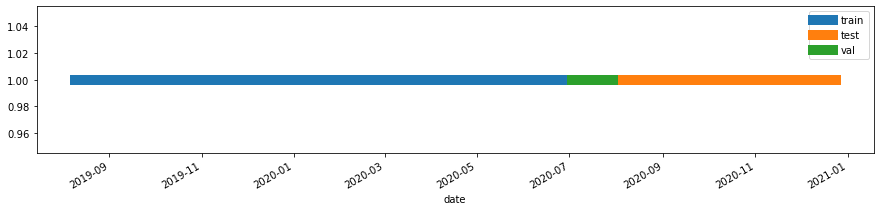

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,3))

kwds = dict(ax=ax, linewidth=10)

create_points(creator.df_train).plot(**kwds)
create_points(creator.df_test).plot(**kwds)
create_points(creator.df_val).plot(**kwds)

plt.legend(['train', 'test', 'val'])

>  The data lines up,  onto the next method!

### def split_and_scale_dataframes
> Not to be confused with the val splitting of dataframes this method is splitting the data into X and y dataframes before scaling it.  You'll see shortly why this is not split into two separate functions.


In [22]:
help(creator.split_and_scale_dataframes)

Help on method split_and_scale_dataframes in module modeling.create:

split_and_scale_dataframes() method of modeling.create.NetworkCreator instance
    Scales and splits the data into X and y of each
    train, test, and val.
    
    Creates X and/or y scalers for inverse reference



```python
    def split_and_scale_dataframes(self):

        # If there is one target
        if len(self.y_cols) == 1:

            # Define scaler
            self.X_scaler = MinMaxScaler()

            # Define y_col_idx
            self.y_col_idx = self.column_indices[self.y_cols[0]]

            # Scale data
            self.df_scaled = self.X_scaler.fit_transform(self.df)

            # Execution saver
            if self.tuning:
                self.X = self.df_scaled[:, :self.y_col_idx].copy()
                self.y = self.df_scaled[:, self.y_col_idx].copy()
                return 1

            self.df_train_scaled = self.X_scaler.transform(self.df_train)
            self.df_test_scaled = self.X_scaler.transform(self.df_test)
            if self.val_split:
                self.df_val_scaled = self.X_scaler.transform(self.df_val)

            # Split data
            self.X = self.df_scaled[:, :self.y_col_idx].copy()
            self.y = self.df_scaled[:, self.y_col_idx].copy()
            self.X_train = self.df_train_scaled[:, :self.y_col_idx].copy()
            self.y_train = self.df_train_scaled[:, self.y_col_idx].copy()
            self.X_test = self.df_test_scaled[:, :self.y_col_idx].copy()
            self.y_test = self.df_test_scaled[:, self.y_col_idx].copy()
            if self.val_split:
                self.X_val = self.df_val_scaled[:, :self.y_col_idx].copy()
                self.y_val = self.df_val_scaled[:, self.y_col_idx].copy()

        elif self.X_cols != self.y_cols:  # Accounting for another scaler

            # Split df by X and y cols
            self.X_df = self.df[self.X_cols]
            self.y_df = self.df[self.y_cols]

            # Tuning has it's own train test split
            if self.tuning:
                self.X_scaler = MinMaxScaler()
                self.y_scaler = MinMaxScaler()
                self.X = self.X_scaler.fit_transform(self.X_df)
                self.y = self.y_scaler.fit_transform(self.y_df)
                return 1

            self.X_df_train = self.df_train[self.X_cols]
            self.y_df_train = self.df_train[self.y_cols]

            self.X_df_test = self.df_test[self.X_cols]
            self.y_df_test = self.df_test[self.y_cols]

            if self.val_split:
                self.X_df_val = self.df_val[self.X_cols]
                self.y_df_val = self.df_val[self.y_cols]

            # Define scalers
            self.X_scaler = MinMaxScaler()
            self.y_scaler = MinMaxScaler()

            # Scale data
            self.X = self.X_scaler.fit_transform(self.X_df)
            self.y = self.y_scaler.fit_transform(self.y_df)

            self.X_train = self.X_scaler.transform(self.X_df_train)
            self.y_train = self.y_scaler.transform(self.y_df_train)

            self.X_test = self.X_scaler.transform(self.X_df_test)
            self.y_test = self.y_scaler.transform(self.y_df_test)

            if self.val_split:
                self.X_val = self.X_scaler.transform(self.X_df_val)
                self.y_val = self.y_scaler.transform(self.y_df_val)

        else:  # If X and y are the same i.e predicting self with self

            # Define scaler, y is 0 because it is not used
            self.X_scaler = MinMaxScaler()
            self.y_scaler = 0

            # Scale data
            self.df_scaled = self.X_scaler.fit_transform(self.df)
            self.df_train_scaled = self.X_scaler.transform(self.df_train)
            self.df_test_scaled = self.X_scaler.transform(self.df_test)
            if self.val_split:
                self.df_val_scaled = self.X_scaler.transform(self.df_val)

            # Split data
            self.X = self.df_scaled.copy()
            self.y = self.df_scaled.copy()

            self.X_train = self.df_train_scaled.copy()
            self.y_train = self.df_train_scaled.copy()

            self.X_test = self.df_test_scaled.copy()
            self.y_test = self.df_test_scaled.copy()

            if self.val_split:
                self.X_val = self.df_val_scaled.copy()
                self.y_val = self.df_val_scaled.copy()
```

> This is quite a long function, but if you break it down it's actually quite simple.  Since we have one target we can simple look at the first branch and ignore the rest.

```python
    # If there is one target
        if len(self.y_cols) == 1:

            # Define scaler
            self.X_scaler = MinMaxScaler()

            # Define y_col_idx
            self.y_col_idx = self.column_indices[self.y_cols[0]]

            # Scale data
            self.df_scaled = self.X_scaler.fit_transform(self.df)

            # Execution saver
            if self.tuning:
                self.X = self.df_scaled[:, :self.y_col_idx].copy()
                self.y = self.df_scaled[:, self.y_col_idx].copy()
                return 1

            self.df_train_scaled = self.X_scaler.transform(self.df_train)
            self.df_test_scaled = self.X_scaler.transform(self.df_test)
            if self.val_split:
                self.df_val_scaled = self.X_scaler.transform(self.df_val)

            # Split data
            self.X = self.df_scaled[:, :self.y_col_idx].copy()
            self.y = self.df_scaled[:, self.y_col_idx].copy()
            self.X_train = self.df_train_scaled[:, :self.y_col_idx].copy()
            self.y_train = self.df_train_scaled[:, self.y_col_idx].copy()
            self.X_test = self.df_test_scaled[:, :self.y_col_idx].copy()
            self.y_test = self.df_test_scaled[:, self.y_col_idx].copy()
            if self.val_split:
                self.X_val = self.df_val_scaled[:, :self.y_col_idx].copy()
                self.y_val = self.df_val_scaled[:, self.y_col_idx].copy()
```

> We start off by defining out X_scaler to be used in transforming.  We fit_transform it on the original df so there are no high or lows unaccounted for.

In [23]:
creator.X_scaler

MinMaxScaler()

> Our `y_col_idx` is for locating the given targets out of the dataframes

In [24]:
creator.y_col_idx

35

In [25]:
creator.df.columns[creator.y_col_idx]

'AAPL_price'

> We'll ignore the if tuning for now, and simply show that inverse transforming the data equals the beginning dataframe. 

In [26]:
creator.df_train_scaled

array([[0.        , 0.24172653, 0.97550075, ..., 0.5       , 0.90491803,
        0.00136807],
       [0.        , 0.24172653, 0.        , ..., 0.5       , 0.90491803,
        0.        ],
       [0.        , 0.24172653, 0.        , ..., 0.5       , 0.90491803,
        0.02524982],
       ...,
       [0.57793424, 0.2569534 , 0.        , ..., 0.5       , 0.0852459 ,
        0.48869855],
       [0.57793424, 0.2569534 , 0.        , ..., 0.5       , 0.0852459 ,
        0.48664644],
       [0.57793424, 0.2569534 , 0.        , ..., 0.5       , 0.0852459 ,
        0.48667618]])

In [27]:
unscaled = creator.X_scaler.inverse_transform(creator.df_train_scaled)

In [28]:
unscaled_train = pd.DataFrame(
    unscaled,
    columns=creator.df_train.columns,
    index=creator.df_train.index)

In [29]:
unscaled_train.head()

,AAPL_RevenueTTM,AAPL_TotalCash,AAPL_ExDividendDate,AAPL_Dividend,AAPL_DividendYield,AAPL_PriceToBook,AAPL_PriceToSales,AAPL_EnterpriseValue,AAPL_PriceToCashFlow,AAPL_PE,...,AAPL_NedDavis,AAPL_TradingCentral,AAPL_Zacks,AAPL_SPValuation,AAPL_SPQuality,AAPL_SPGrowthStability,AAPL_SPFinancialHealth,AAPL_ThomsonReutersVerus,AAPL_ThomsonReutersIBES,AAPL_price
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,259034.0,94880.0,18117.0,0.77,1.51403,9.55691,3.65644,9.353597e+11,13.96616,17.1,...,3.0,3.0,3.0,87.0,93.0,14.0,73.0,3.0,2.25,50.2350
2019-08-12,259034.0,94880.0,0.0,0.77,1.53241,9.44229,3.61259,9.243031e+11,13.79865,17.0,...,3.0,3.0,3.0,87.0,93.0,14.0,73.0,3.0,2.25,50.1200
2019-08-13,259034.0,94880.0,0.0,0.77,1.53631,9.41833,3.60342,9.219921e+11,13.76363,17.8,...,3.0,3.0,3.0,87.0,93.0,14.0,73.0,3.0,2.25,52.2425
2019-08-14,259034.0,94880.0,0.0,0.77,1.47390,9.81718,3.75602,9.604636e+11,14.34650,17.2,...,3.0,3.0,3.0,87.0,93.0,14.0,73.0,3.0,2.25,50.6875
2019-08-15,259034.0,94880.0,0.0,0.77,1.51911,9.52497,3.64422,9.322783e+11,13.91948,17.1,...,3.0,3.0,3.0,87.0,93.0,14.0,73.0,3.0,2.25,50.4350


In [30]:
creator.df_train.head()

,AAPL_RevenueTTM,AAPL_TotalCash,AAPL_ExDividendDate,AAPL_Dividend,AAPL_DividendYield,AAPL_PriceToBook,AAPL_PriceToSales,AAPL_EnterpriseValue,AAPL_PriceToCashFlow,AAPL_PE,...,AAPL_NedDavis,AAPL_TradingCentral,AAPL_Zacks,AAPL_SPValuation,AAPL_SPQuality,AAPL_SPGrowthStability,AAPL_SPFinancialHealth,AAPL_ThomsonReutersVerus,AAPL_ThomsonReutersIBES,AAPL_price
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,259034.0,94880.0,18117,0.77,1.51403,9.55691,3.65644,9.353597e+11,13.96616,17.1,...,3.0,3,3,87.0,93.0,14.0,73.0,3.0,2.25,50.2350
2019-08-12,259034.0,94880.0,0,0.77,1.53241,9.44229,3.61259,9.243031e+11,13.79865,17.0,...,3.0,3,3,87.0,93.0,14.0,73.0,3.0,2.25,50.1200
2019-08-13,259034.0,94880.0,0,0.77,1.53631,9.41833,3.60342,9.219921e+11,13.76363,17.8,...,3.0,3,3,87.0,93.0,14.0,73.0,3.0,2.25,52.2425
2019-08-14,259034.0,94880.0,0,0.77,1.47390,9.81718,3.75602,9.604636e+11,14.34650,17.2,...,3.0,3,3,87.0,93.0,14.0,73.0,3.0,2.25,50.6875
2019-08-15,259034.0,94880.0,0,0.77,1.51911,9.52497,3.64422,9.322783e+11,13.91948,17.1,...,3.0,3,3,87.0,93.0,14.0,73.0,3.0,2.25,50.4350


In [31]:
(unscaled_train != creator.df_train).head()

,AAPL_RevenueTTM,AAPL_TotalCash,AAPL_ExDividendDate,AAPL_Dividend,AAPL_DividendYield,AAPL_PriceToBook,AAPL_PriceToSales,AAPL_EnterpriseValue,AAPL_PriceToCashFlow,AAPL_PE,...,AAPL_NedDavis,AAPL_TradingCentral,AAPL_Zacks,AAPL_SPValuation,AAPL_SPQuality,AAPL_SPGrowthStability,AAPL_SPFinancialHealth,AAPL_ThomsonReutersVerus,AAPL_ThomsonReutersIBES,AAPL_price
date,,,,,,,,,,,,,,,,,,,,,
2019-08-09,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2019-08-12,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-08-13,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2019-08-14,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-08-15,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
unscaled_train['AAPL_RevenueTTM'][0]

259033.99999999997

In [33]:
creator.df_train['AAPL_RevenueTTM'][0]

259034.0

>  You can see the differences is a rounding error. Let's try and sum the differences to see how miniscule it is

In [34]:
(creator.df_train - unscaled_train).sum().sum()

-0.0017089826584495912

### def reshape_data
> reshape data is for reshaping the data in a way the time series generator can handle it.

In [35]:
help(creator.reshape_data)

Help on method reshape_data in module modeling.create:

reshape_data() method of modeling.create.NetworkCreator instance
    Reshapes the data based on 
      - length of X/y
      - X/y number of features
    reshape(length, n_features)



```python
    def reshape_data(self):
        """
        Reshapes the data based on 
          - length of X/y
          - X/y number of features
        reshape(length, n_features)
        """
        # Get n_features
        self.X_n_features = self.X.shape[1]

        if len(self.y_cols) == 1:
            self.y_n_features = 1
        else:
            self.y_n_features = self.y.shape[1]

        # Reshape data
        #   Execution saver
        if self.tuning:
            self.X_reshaped = self.X.reshape((len(self.X),
                                             self.X_n_features))
            self.y_reshaped = self.y.reshape((len(self.y),
                                             self.y_n_features))
            return 1

        self.X_train_reshaped = self.X_train.reshape((len(self.X_train),
                                                      self.X_n_features))
        self.y_train_reshaped = self.y_train.reshape((len(self.y_train),
                                                      self.y_n_features))

        self.X_test_reshaped = self.X_test.reshape((len(self.X_test),
                                                    self.X_n_features))
        self.y_test_reshaped = self.y_test.reshape((len(self.y_test),
                                                    self.y_n_features))

        if self.val_split:
            self.X_val_reshaped = self.X_val.reshape((len(self.X_val),
                                                      self.X_n_features))
            self.y_val_reshaped = self.y_val.reshape((len(self.y_val),
                                                      self.y_n_features))
```

In [36]:
creator.y_train.shape

(231,)

In [37]:
creator.y_train_reshaped.shape

(231, 1)

In [38]:
creator.X_train.shape

(231, 35)

In [39]:
creator.X_train_reshaped.shape

(231, 35)

> You can see that X_train doesn't change, but y_train does.  If there was one feature it would do the same for X_train.

### def create_TS_generators
> Onto the creating of the time series generators.  Originally we set n_days to one so we will show what that did, and then show what happens when we change n_days.

In [40]:
help(creator.create_TS_generators)

Help on method create_TS_generators in module modeling.create:

create_TS_generators(n_days) method of modeling.create.NetworkCreator instance
    Creates the data generators.
    
    TS = tensorflow.keras.preprocessing.sequence.TimeseriesGenerator
        - Time series generator for feeding into the model
        splits on data and targets.
    
    Example
    ----------------------------------------
    data =
          apple  orange  banana
    date
      1     1      2       2
      2     4      2       3
      3     3      3       6
    
    data = [apple, orange, banana]
    target = banana
    target is banana the following day, predicted
    with n_days before
    
    TS[n_days = 1]:
    Here banana on day two is predicted with all of the the data
    from day one, then day three is predicted from all of the data
    from day two
        data:
            [[1, 2, 2],
            [4, 2, 3]]
        target:
            [[3],
            [6]]
    TS[n_days = 2]:
    Here banana

```python
    def create_TS_generators(self, n_days):
        if self.tuning:
            data = sequence.TimeseriesGenerator(
                self.X_reshaped,
                self.y_reshaped,
                length=self.n_input
            )
            return data

        train = sequence.TimeseriesGenerator(
            self.X_train_reshaped,
            self.y_train_reshaped,
            length=self.n_input
            )

        test = sequence.TimeseriesGenerator(
            self.X_test_reshaped,
            self.y_test_reshaped,
            length=self.n_input
            )

        if self.val_split:
            val = sequence.TimeseriesGenerator(
                self.X_val_reshaped,
                self.y_val_reshaped,
                length=self.n_input
                )
            return train, test, val

        return train, test
```

> We'll ignore the tuning for now,  but let's call the function and get each of the time series generators to analyze what is created

In [49]:
train_gen, test_gen, val_gen = creator.create_TS_generators(n_days=3)

>for a generator we can pull out X and y to see the shape. The TimeSeriesGenerator works by

In [50]:
X, y = train_gen[0]

In [51]:
X[0]

array([[0.        , 0.24172653, 0.97550075, 0.91869919, 0.97591846,
        0.0803882 , 0.2546881 , 0.21056232, 0.24114823, 0.23624595,
        0.        , 0.        , 0.        , 0.04671975, 0.47887411,
        0.04694591, 0.20944665, 0.00826982, 0.00136807, 0.        ,
        0.25      , 0.        , 1.        , 0.92982456, 1.        ,
        1.        , 0.        , 1.        , 0.25      , 1.        ,
        0.66666667, 0.02439024, 0.94736842, 0.5       , 0.90491803],
       [0.        , 0.24172653, 0.        , 0.91869919, 0.99578465,
        0.07612229, 0.24800007, 0.20429657, 0.23462178, 0.23300971,
        0.        , 0.        , 0.        , 0.03887501, 0.46478025,
        0.03920602, 0.20309792, 0.00806834, 0.        , 0.        ,
        0.25      , 0.        , 1.        , 0.92982456, 1.        ,
        1.        , 0.        , 1.        , 0.25      , 1.        ,
        0.66666667, 0.02439024, 0.94736842, 0.5       , 0.90491803],
       [0.        , 0.24172653, 0.        , 0.

> You can see X is three days for one price.

In [52]:
y[0]

array([0.00675113])

In [43]:
X.shape, y.shape

((128, 3, 35), (128, 1))

> X as `(128, 1, 35)` shows 128 periods of 3 days consisting of 35 features, and y being `(128, 1)` shows 128 periods of 1 feature.  Now let's look at using one day to predict.

In [53]:
train_gen, test_gen, val_gen = creator.create_TS_generators(n_days=1)
X, y = train_gen[0]
X.shape, y.shape

((128, 1, 35), (128, 1))

In [54]:
X[0]

array([[0.        , 0.24172653, 0.97550075, 0.91869919, 0.97591846,
        0.0803882 , 0.2546881 , 0.21056232, 0.24114823, 0.23624595,
        0.        , 0.        , 0.        , 0.04671975, 0.47887411,
        0.04694591, 0.20944665, 0.00826982, 0.00136807, 0.        ,
        0.25      , 0.        , 1.        , 0.92982456, 1.        ,
        1.        , 0.        , 1.        , 0.25      , 1.        ,
        0.66666667, 0.02439024, 0.94736842, 0.5       , 0.90491803]])

In [55]:
y[0]

array([0.])

>  That's it for our `prepare_data` function.  The next step of our sample code is our build and fit model.  Let's check it out!

## def build_and_fit_model

In [56]:
help(creator.build_and_fit_model)

Help on method build_and_fit_model in module modeling.create:

build_and_fit_model(hp=None, **parameters) method of modeling.create.NetworkCreator instance
    wrapper for build and fit model



```python
    def build_and_fit_model(self, hp=None, **parameters):
        """wrapper for build and fit model"""
        builder = NetworkBuilder(
            self,
            self.n_input,
            self.input_shape,
            output_shape=len(self.y_cols)
            )
        self.model = builder.build_and_fit_model(hp, **parameters)
        return self.model
```

> As you can see this simply creates a `NetworkBuilder` instance, and then calls the build_and_fit_model of that instance.  Let's look at a quick sample of that.  One of the parameters we fed in was `'input_dropout_rate': 0.1,`, what does that do?

```python
#           Dropout layer
input_dropout_rate = self.hp.Choice('input_dropout_rate',
                                    input_dropout_rate)
if input_dropout_rate != 0:
    self.model.add(Dropout(input_dropout_rate))
```

> This is a small batch of code from our Builder.  If hp is being dummied (which it is)  it simple selected the given parameter, so you can ignore the hp.Choice as that is for tuning.  There are many other parameters we can change, and even tune.  Let's take a look at the documentation for builder.

In [58]:
from modeling.build import NetworkBuilder

In [59]:
help(NetworkBuilder.build_and_fit_model)

Help on function build_and_fit_model in module modeling.build:

build_and_fit_model(self, hp=None, n_days=1, input_dropout_rate=0, use_input_regularizer=0, input_regularizer_penalty=0, add_gaussian_noise=0, gaussian_noise_quotient=0, add_hidden_lstm=0, hidden_lstm_neurons=64, n_hidden_layers=1, hidden_layer_activation='relu', hidden_dropout_rate=0.3, hidden_neurons=64, use_hidden_regularizer=0, hidden_regularizer_penalty=0, optimizer='adam', use_early_stopping=False, monitor='val_loss', patience=5, batch_size=32, shuffle=False, dummy_hp=False)
    Parameters
    ----------------------------------------
    hp=None,
    dummy_hp=False(bool)::
        - whether to use a dummy_hp or not for simply building the
        model or tuning it.  Will return an error if the model is not
        tuning and dummy_hp is False
    
    Data Params
        ------------------------------------
    n_days=1,
    
    Input Layer Params
        ------------------------------------
    input_neurons=64
  

> Above are all of the tunable parameters for our neural network; creating a simple way to tune a given model, and use those tuned parameters to create a network.

## Fit

> Finally we call our model fit method.  Which is the keras fit function slightly modified with a partial function.  As you can see below we change the fit method to include parameters we added to it, and can still call it as we would normally call a fit function

```python
# From our NetworkBuilder.build_and_fit_model method
self.model.fit = partial(
    self.model.fit,
    callbacks=model_callbacks,
    batch_size=self.hp.Choice('batch_size', batch_size),
    shuffle=shuffle
    )
```

> Then to call the fit function as we did before

```python
history = creator.model.fit(
    creator.train_data_gen,
    validation_data=creator.val_data_gen,
    epochs=10)
```

<div class="alert alert-success shadow"> 
    <b>Check out our other notebooks if this is where you started</b>
    <ul>
        <li><a href="./main.ipynb">Main</a>: showcasing our entire project</li>
        <li><a href="./Pull and clean data.ipynb">Scrubbing</a>: showcasing the cleaning of our data</li>
    </ul>
</div>